In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
from sqlalchemy import inspect
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
print("Table name : measurement")
for column in columns:
    print(column["name"], column["type"])
print(" ")    
print("Table name : station")
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])


Table name : measurement
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
 
Table name : station
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
session.query(Station.station, Station.name, Station.latitude, Station.longitude).order_by(Station.station).all()

[('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139)]

# Observation : It is confirmed that all station are at Honolulu island


In [12]:
session.query(Measurement.station, func.max(Measurement.date)).group_by(Measurement.station).order_by(Measurement.station).all()

[('USC00511918', '2015-10-30'),
 ('USC00513117', '2017-07-31'),
 ('USC00514830', '2017-08-23'),
 ('USC00516128', '2017-08-23'),
 ('USC00517948', '2017-07-31'),
 ('USC00518838', '2015-11-20'),
 ('USC00519281', '2017-08-18'),
 ('USC00519397', '2017-08-23'),
 ('USC00519523', '2017-08-23')]

('2017-08-23',)
last_date:2017-08-23, date_year_ago:2016-08-23


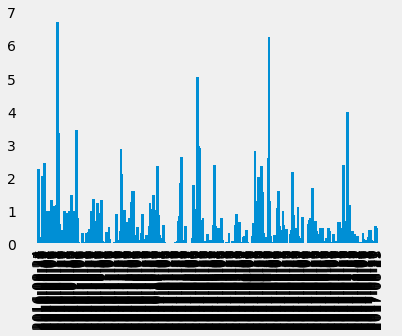

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
print(session.query(Measurement.date).order_by(Measurement.date.desc()).first())
# print(session.query(Measurement.date, Measurement.prcp).order_by(Measurement.prcp.desc()).all())

last_date = dt.date(2017,8,23)
# Calculate the date 1 year ago from the last data point in the database
date_year_ago = last_date - dt.timedelta(days=365)
print(f'last_date:{last_date}, date_year_ago:{date_year_ago}')
# print(session.query(Measurement.date, Measurement.prcp, Measurement.station).filter(Measurement.date > date_year_ago).order_by(Measurement.prcp.desc()).all())

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp)\
                     .filter(Measurement.date > date_year_ago).order_by(Measurement.date.desc()).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(precipitation_data)
prcp_df.set_index('date', inplace=True)
max_prcp_df = prcp_df.groupby('date').max().sort_values('date', ascending=True)
plt.bar(max_prcp_df.index, max_prcp_df.prcp, width=3)
plt.grid()
plt.xticks(rotation=90)
plt.show()
# # # Sort the dataframe by date
# # # avg_prcp_df
# # # Use Pandas Plotting with Matplotlib to plot the data
# max_prcp_df.plot(kind='bar')
# # plt.xticks(rotation=90)
# # plt.show()

In [ ]:
print(len(b))

In [ ]:
# b.plot(kind='bar',figsize=(5,4),width=10)
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
last_date = dt.date(2017,8,23)
# Calculate the date 1 year ago from the last data point in the database
date_year_ago = last_date - dt.timedelta(days=365)
delta = dt.timedelta(days=1)
dates = drange(date_year_ago, last_date, delta)
plt.plot_date(dates, b.prcp)
plt.show()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [ ]:
# Design a query to show how many stations are available in this dataset?


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
